# Problem Statement

# The Business Context :- 
## A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.


ID          >> ID of each client

LIMIT_BAL   >>  Amount of given credit in NT dollars (includes individual and family/supplementary credit) 

SEX         >>   Gender(1=male, 2=female)

EDUCATION   >> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown,6=unknown)

MARRIAGE Marital status (1=married, 2=single, 3=others)

AGE         >>  Age in years

PAY_0      >> Repayment status in September, 2005 (-2=no consumption, -1=pay duly,0=the use of revolving credit, 1=payment delay for one month, 2=payment
delay for two months, … 8=payment delay for eight months, 9=payment
delay for nine months and above)

PAY_2      >>  Repayment status in August, 2005 (scale same as above)

PAY_3      >> Repayment status in July, 2005 (scale same as above)

PAY_4      >> Repayment status in June, 2005 (scale same as above)

PAY_5      >> Repayment status in May, 2005 (scale same as above)

PAY_6      >> Repayment status in April, 2005 (scale same as above)

BILL_AMT1  >> Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2  >> Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3  >>Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4  >>  Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5   >>Amount of bill statement in May, 2005 (NT dollar)
 
BILL_AMT6  >> Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1   >> Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2   >> Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3  >> Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4   >> Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5  >> Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6  >>Amount of previous payment in April, 2005 (NT dollar)

TARGET VARIABLE  >> default.payment.next.month Default payment (1=yes, 0=no)



## Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle

## Step2- Data Gathering

In [3]:
df=pd.read_csv('Credit card Defaulter final.csv')
df

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,0,1,20000.0,female,university,married,24,payment delay for two months,payment delay for two months,pay duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,1,2,120000.0,female,university,single,26,pay duly,payment delay for two months,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,2,3,90000.0,female,university,single,34,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,3,4,50000.0,female,university,married,37,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,4,5,50000.0,male,university,married,57,pay duly,the use of revolving credit,pay duly,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000.0,male,high school,married,39,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,29996,29997,150000.0,male,high school,single,43,pay duly,pay duly,pay duly,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,29997,29998,30000.0,male,university,single,37,payment delay for four months,payment delay for three months,payment delay for two months,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,29998,29999,80000.0,male,high school,married,41,payment delay for one month,pay duly,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               30000 non-null  int64  
 1   ID                                       30000 non-null  int64  
 2   LIMIT_BAL                                30000 non-null  float64
 3   SEX                                      30000 non-null  object 
 4   EDUCATION                                30000 non-null  object 
 5   MARRIAGE                                 30000 non-null  object 
 6   AGE                                      30000 non-null  int64  
 7   Repayment status in September            30000 non-null  object 
 8   Repayment status in August               30000 non-null  object 
 9   Repayment status in July                 30000 non-null  object 
 10  Repayment status in June                 30000

In [5]:
df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LIMIT_BAL                                30000 non-null  float64
 1   SEX                                      30000 non-null  object 
 2   EDUCATION                                30000 non-null  object 
 3   MARRIAGE                                 30000 non-null  object 
 4   AGE                                      30000 non-null  int64  
 5   Repayment status in September            30000 non-null  object 
 6   Repayment status in August               30000 non-null  object 
 7   Repayment status in July                 30000 non-null  object 
 8   Repayment status in June                 30000 non-null  object 
 9   Repayment status in May                  30000 non-null  object 
 10  Repayment status in April                30000

# Step3- EDA

# Feature 1:- LIMIT_BAL

In [7]:
df['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

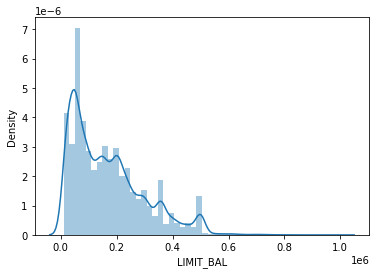

In [8]:
sns.distplot(df['LIMIT_BAL'])

<AxesSubplot:xlabel='LIMIT_BAL'>

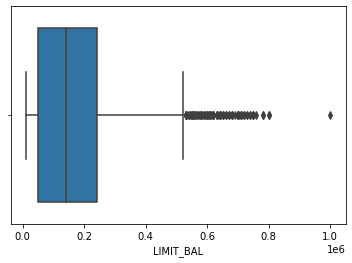

In [9]:
sns.boxplot(df['LIMIT_BAL'])

50000.0 140000.0 240000.0


525000.0 -235000.0







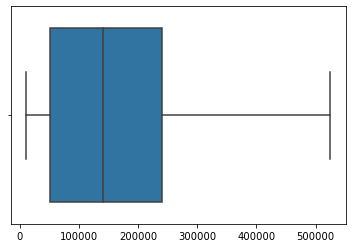

In [10]:
def Outliers(i):
    q1=i.quantile(0.25)
    q2=i.quantile(0.50)
    q3=i.quantile(0.75)
    print(q1,q2,q3)
    print()
    iqr=q3-q1
    iqr
    print()
    uppr_lmt=q3+(1.5*iqr)
    lwr_lmt=q1-(1.5*iqr)
    print(uppr_lmt,lwr_lmt)
    print()
    outliers=df[(i>uppr_lmt)|(i<lwr_lmt)].index
    outliers
    print()
    import numpy as np
    i.mean()
    print()
    import numpy as np
    i=np.where(i>uppr_lmt,uppr_lmt,i)
    print()
    i.mean()
    print()
    sns.boxplot(i)
    return i

a = Outliers(df['LIMIT_BAL'])

In [11]:
df['LIMIT_BAL']


0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64

In [12]:
df['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

## Feature 2:- SEX

In [13]:
#SEX         >>   Gender(1=male, 2=female)
df['SEX'].replace({'male':1,'female':2},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,university,married,24,payment delay for two months,payment delay for two months,pay duly,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,university,single,26,pay duly,payment delay for two months,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,university,single,34,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,university,married,37,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,university,married,57,pay duly,the use of revolving credit,pay duly,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,high school,married,39,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,high school,single,43,pay duly,pay duly,pay duly,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,university,single,37,payment delay for four months,payment delay for three months,payment delay for two months,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,high school,married,41,payment delay for one month,pay duly,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [14]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [15]:
df['SEX'].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

[Text(0.5, 1.0, 'Gender_Rep'), Text(0, 0.5, 'Head_count')]

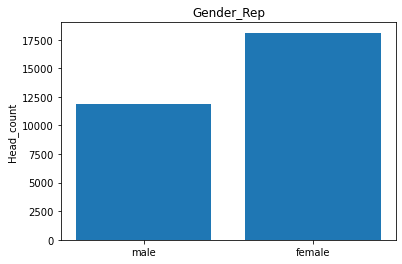

In [16]:
SEX = {'male':11888,
      'female':18112}
fig,ax= plt.subplots()
ax.bar(SEX.keys(),SEX.values())
ax.set(title='Gender_Rep',ylabel='Head_count')

## Feature 3:-EDUCATION

In [17]:
#EDUCATION   >> (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown,6=unknown)

In [18]:
df['EDUCATION'].unique()

array(['university', 'graduate school', 'high school', 'others'],
      dtype=object)

In [19]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

In [20]:
df['EDUCATION'].replace({'graduate school':1, 'university':2, 'high school':3, 'others':4},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,married,24,payment delay for two months,payment delay for two months,pay duly,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,single,26,pay duly,payment delay for two months,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,single,34,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,married,37,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,married,57,pay duly,the use of revolving credit,pay duly,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,married,39,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,single,43,pay duly,pay duly,pay duly,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,single,37,payment delay for four months,payment delay for three months,payment delay for two months,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,married,41,payment delay for one month,pay duly,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [21]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [22]:
df['EDUCATION'].dtype

dtype('int64')

<AxesSubplot:xlabel='EDUCATION', ylabel='Density'>

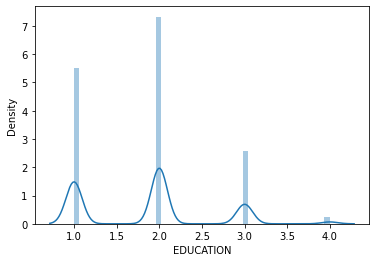

In [23]:
sns.distplot(df['EDUCATION'])

[Text(0.5, 1.0, 'EDUCATION TYPE'), Text(0, 0.5, 'Head_count')]

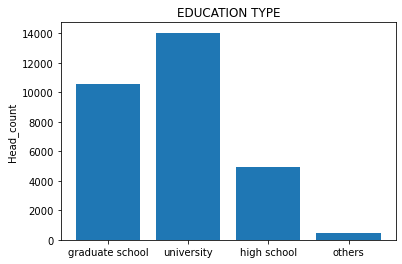

In [24]:
EDUCATION = {'graduate school':10585, 'university':14030, 'high school':4917, 'others':468}
fig,ax= plt.subplots()
ax.bar(EDUCATION.keys(),EDUCATION.values())
ax.set(title='EDUCATION TYPE',ylabel='Head_count')

##  Feature 4:- MARRIAGE 

In [25]:
#Marital status (1=married, 2=single, 3=others)

In [26]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

In [27]:
df['MARRIAGE'].replace({'married':1, 'single':2, 'others':3},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,payment delay for two months,payment delay for two months,pay duly,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,pay duly,payment delay for two months,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,pay duly,the use of revolving credit,pay duly,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,pay duly,pay duly,pay duly,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,payment delay for four months,payment delay for three months,payment delay for two months,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,payment delay for one month,pay duly,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [28]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [29]:
df['MARRIAGE'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Relationship Status'), Text(0, 0.5, 'Head_count')]

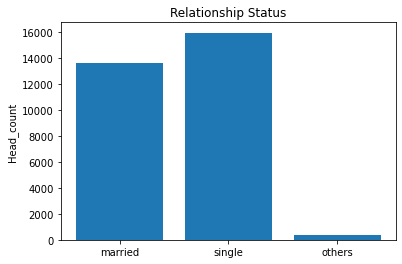

In [30]:
MARRIAGE = {'married':13659, 'single':15964, 'others':377}
fig,ax= plt.subplots()
ax.bar(MARRIAGE.keys(),MARRIAGE.values())
ax.set(title='Relationship Status',ylabel='Head_count')

In [31]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment status in September', 'Repayment status in August',
       'Repayment status in July', 'Repayment status in June',
       'Repayment status in May', 'Repayment status in April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'Amount of previous payment in September',
       'Amount of previous payment in August',
       'Amount of previous payment in July',
       'Amount of previous payment in June',
       'Amount of previous payment in May',
       'Amount of previous payment in April', 'default.payment.next.month'],
      dtype='object')

## Feature 5:- (september)

In [32]:
df['Repayment status in September'].value_counts()

the use of revolving credit                 14737
pay duly                                     5686
payment delay for one month                  3688
no consumption                               2759
payment delay for two months                 2667
payment delay for three months                322
payment delay for four months                  76
payment delay for  five months                 26
payment delay for eight months and above       19
payment delay for six months                   11
payment delay for seven months                  9
Name: Repayment status in September, dtype: int64

In [33]:
df['Repayment status in September'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,payment delay for two months,pay duly,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,payment delay for two months,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,the use of revolving credit,pay duly,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,pay duly,pay duly,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,payment delay for three months,payment delay for two months,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,pay duly,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [34]:
df['Repayment status in September'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [35]:
df['Repayment status in September'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment status in September, dtype: int64

In [36]:
df['Repayment status in September'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Repayment status in September'),
 Text(0, 0.5, 'payment delay in number of months')]

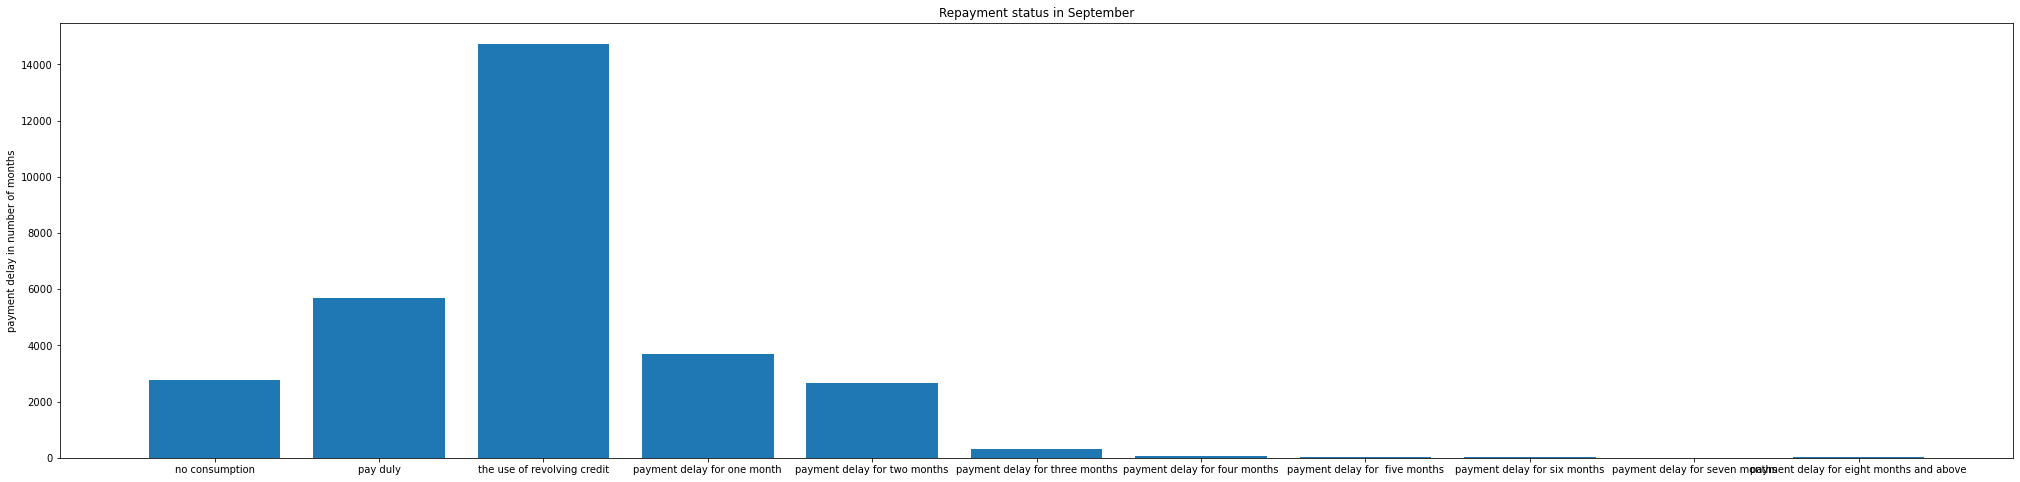

In [37]:
September = {'no consumption':2759, 'pay duly':5686,'the use of revolving credit':14737, 'payment delay for one month':3688,
                     'payment delay for two months':2667,'payment delay for three months':322,
                     'payment delay for four months':76,'payment delay for  five months':26,
                     'payment delay for six months':11,'payment delay for seven months':9,
                     'payment delay for eight months and above':19}
fig,ax= plt.subplots(figsize = (35,8))
ax.bar(September.keys(),September.values())
ax.set(title='Repayment status in September',ylabel='payment delay in number of months')

## Feature 6:- (August)

In [38]:
df['Repayment status in August'].value_counts()

the use of revolving credit                 15730
pay duly                                     6050
payment delay for two months                 3927
no consumption                               3782
payment delay for three months                326
payment delay for four months                  99
payment delay for one month                    28
payment delay for  five months                 25
payment delay for seven months                 20
payment delay for six months                   12
payment delay for eight months and above        1
Name: Repayment status in August, dtype: int64

In [39]:
df['Repayment status in August'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,pay duly,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,2,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,0,pay duly,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,-1,pay duly,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,3,payment delay for two months,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,-1,the use of revolving credit,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [40]:
df['Repayment status in August'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Repayment status in August, dtype: int64

In [41]:
df['Repayment status in August'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Repayment status in August'),
 Text(0, 0.5, 'payment delay in number of months')]

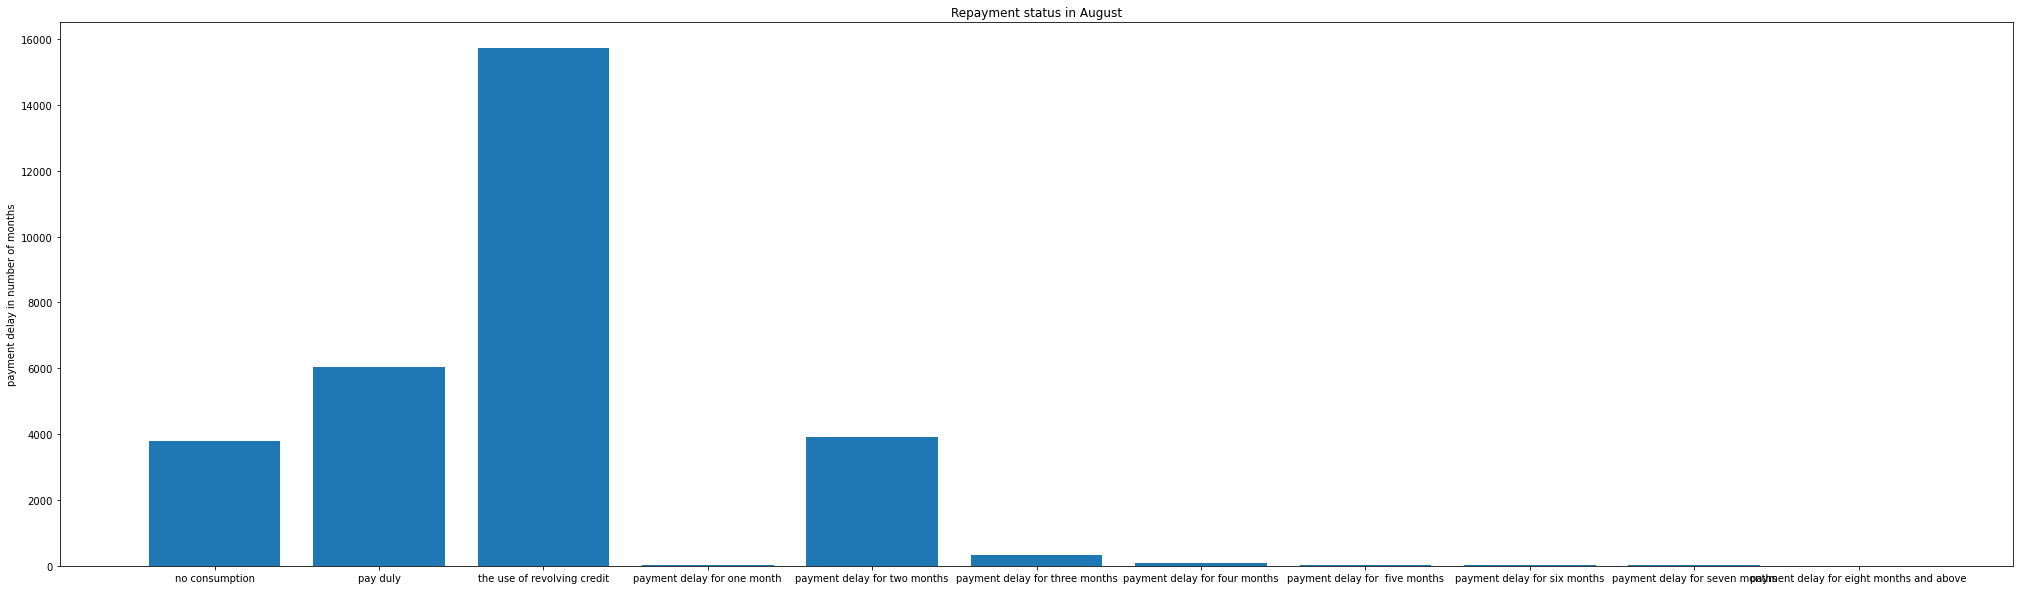

In [42]:
August = {'no consumption':3782, 'pay duly':6050,'the use of revolving credit':15730, 'payment delay for one month':28,
                     'payment delay for two months':3927,'payment delay for three months':326,
                     'payment delay for four months':99,'payment delay for  five months':25,
                     'payment delay for six months':12,'payment delay for seven months':20,
                     'payment delay for eight months and above':1}
fig,ax= plt.subplots(figsize = (35,10))
ax.bar(August.keys(),August.values())
ax.set(title='Repayment status in August',ylabel='payment delay in number of months')

## Feature 7:-(July)

In [43]:
df['Repayment status in July'].value_counts()

the use of revolving credit                 15764
pay duly                                     5938
no consumption                               4085
payment delay for two months                 3819
payment delay for three months                240
payment delay for four months                  76
payment delay for seven months                 27
payment delay for six months                   23
payment delay for  five months                 21
payment delay for one month                     4
payment delay for eight months and above        3
Name: Repayment status in July, dtype: int64

In [44]:
df['Repayment status in July'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,pay duly,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,2,0,the use of revolving credit,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,0,0,the use of revolving credit,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,0,0,the use of revolving credit,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,0,-1,the use of revolving credit,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,the use of revolving credit,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,-1,-1,pay duly,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,3,2,pay duly,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,-1,0,the use of revolving credit,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [45]:
df['Repayment status in July'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Repayment status in July, dtype: int64

In [46]:
df['Repayment status in July'].dtype

dtype('int64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LIMIT_BAL                                30000 non-null  float64
 1   SEX                                      30000 non-null  int64  
 2   EDUCATION                                30000 non-null  int64  
 3   MARRIAGE                                 30000 non-null  int64  
 4   AGE                                      30000 non-null  int64  
 5   Repayment status in September            30000 non-null  int64  
 6   Repayment status in August               30000 non-null  int64  
 7   Repayment status in July                 30000 non-null  int64  
 8   Repayment status in June                 30000 non-null  object 
 9   Repayment status in May                  30000 non-null  object 
 10  Repayment status in April                30000

[Text(0.5, 1.0, 'Repayment status in July'),
 Text(0, 0.5, 'payment delay in number of months')]

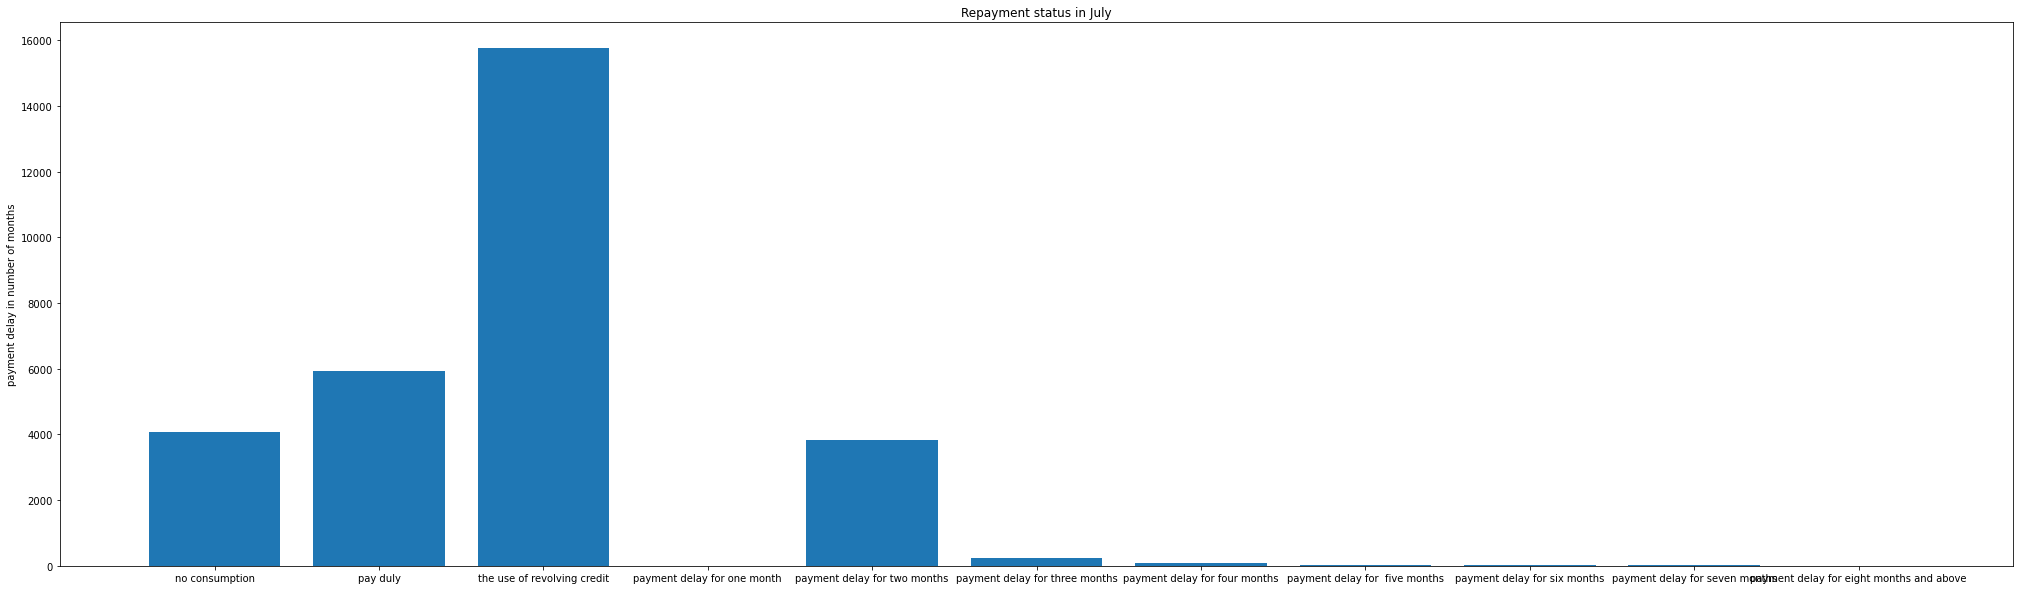

In [48]:
July = {'no consumption':4085, 'pay duly':5938,'the use of revolving credit':15764, 'payment delay for one month':4,
                     'payment delay for two months':3819,'payment delay for three months':240,
                     'payment delay for four months':76,'payment delay for  five months':21,
                     'payment delay for six months':23,'payment delay for seven months':27,
                     'payment delay for eight months and above':3}
fig,ax= plt.subplots(figsize = (35,10))
ax.bar(July.keys(),July.values())
ax.set(title='Repayment status in July',ylabel='payment delay in number of months')

## Feature 8:- (June)

In [49]:
df['Repayment status in June'].value_counts()

the use of revolving credit                 16455
pay duly                                     5687
no consumption                               4348
payment delay for two months                 3159
payment delay for three months                180
payment delay for four months                  69
payment delay for seven months                 58
payment delay for  five months                 35
payment delay for six months                    5
payment delay for one month                     2
payment delay for eight months and above        2
Name: Repayment status in June, dtype: int64

In [50]:
df['Repayment status in June'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,no consumption,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,2,0,0,the use of revolving credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,0,0,0,the use of revolving credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,0,0,0,the use of revolving credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,0,-1,0,the use of revolving credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,the use of revolving credit,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,-1,-1,-1,the use of revolving credit,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,3,2,-1,the use of revolving credit,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,-1,0,0,the use of revolving credit,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [51]:
df['Repayment status in June'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: Repayment status in June, dtype: int64

In [52]:
df['Repayment status in June'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Repayment status in June'),
 Text(0, 0.5, 'payment delay in number of months')]

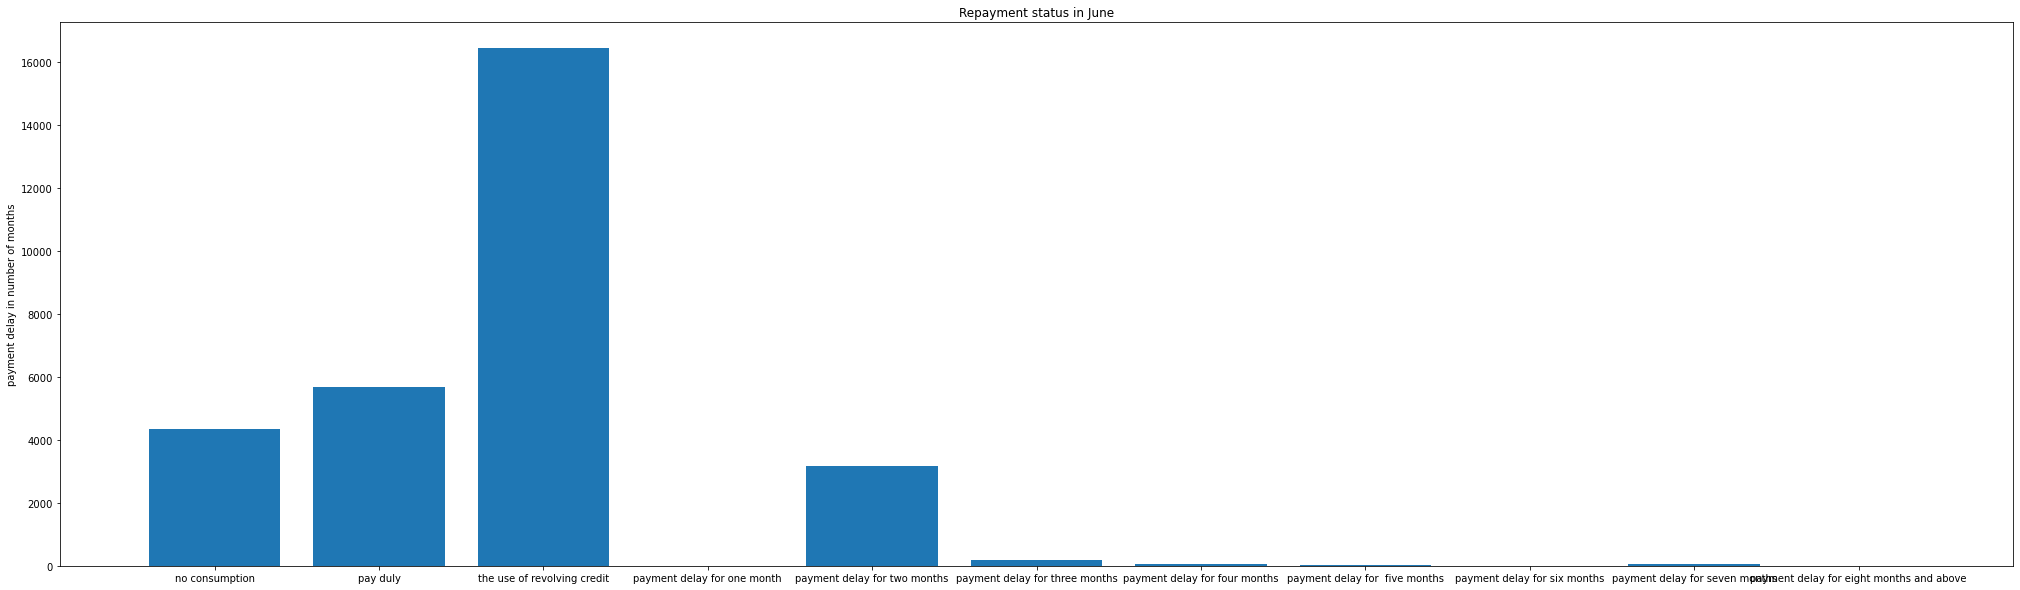

In [53]:
June = {'no consumption':4348, 'pay duly':5687,'the use of revolving credit':16455, 'payment delay for one month':2,
                     'payment delay for two months':3159,'payment delay for three months':180,
                     'payment delay for four months':69,'payment delay for  five months':35,
                     'payment delay for six months':5,'payment delay for seven months':58,
                     'payment delay for eight months and above':2}
fig,ax= plt.subplots(figsize = (35,10))
ax.bar(June.keys(),June.values())
ax.set(title='Repayment status in June',ylabel='payment delay in number of months')

## Feature 9:- (May)

In [54]:
df['Repayment status in May'].value_counts()

the use of revolving credit                 16947
pay duly                                     5539
no consumption                               4546
payment delay for two months                 2626
payment delay for three months                178
payment delay for four months                  84
payment delay for seven months                 58
payment delay for  five months                 17
payment delay for six months                    4
payment delay for eight months and above        1
Name: Repayment status in May, dtype: int64

In [55]:
df['Repayment status in May'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [56]:
df['Repayment status in May'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: Repayment status in May, dtype: int64

In [57]:
df['Repayment status in May'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Repayment status in May'),
 Text(0, 0.5, 'payment delay in number of months')]

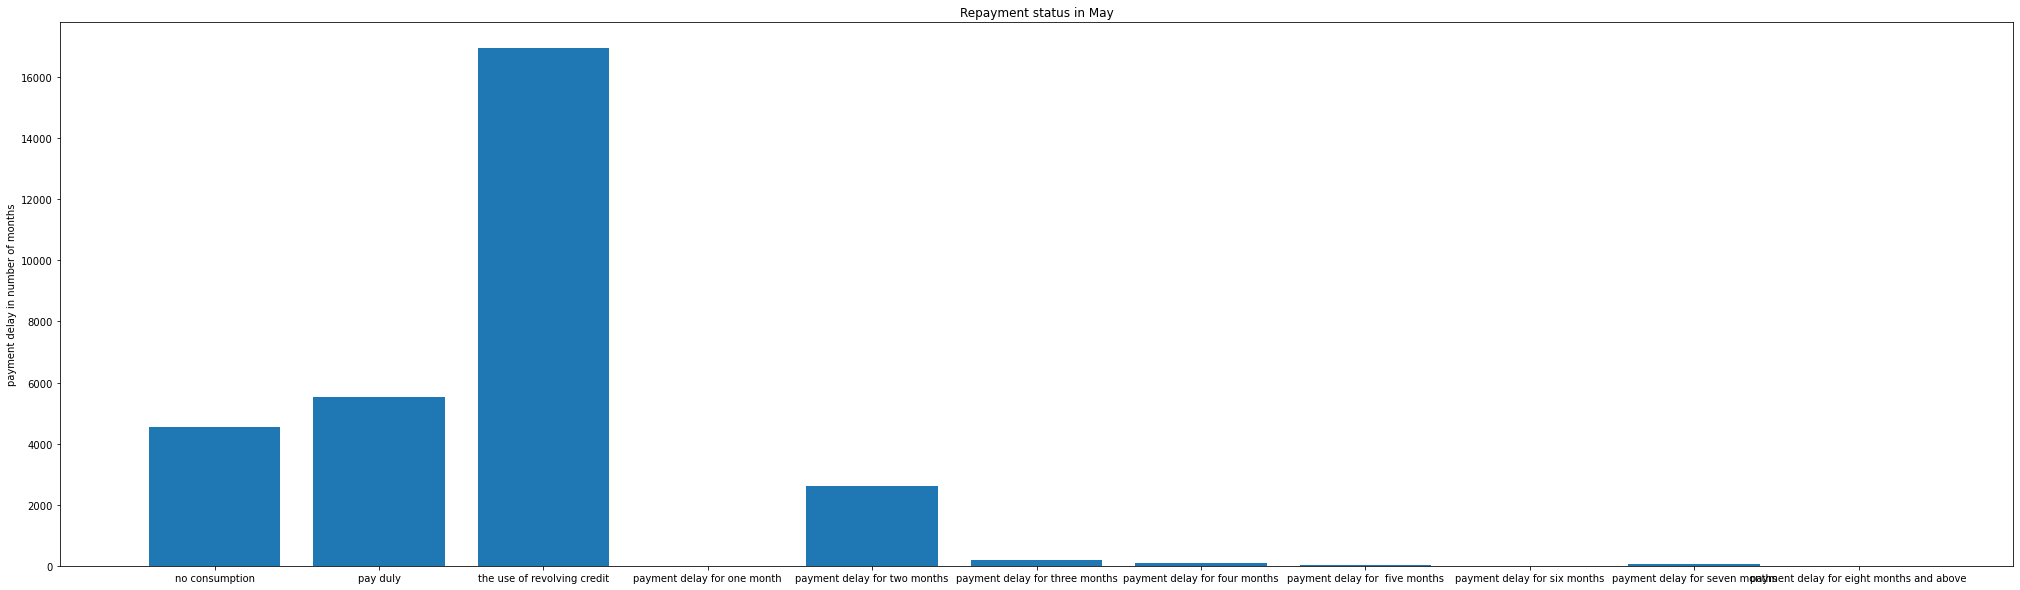

In [58]:
May = {'no consumption':4546, 'pay duly':5539,'the use of revolving credit':16947, 'payment delay for one month':0,
                     'payment delay for two months':2626,'payment delay for three months':178,
                     'payment delay for four months':84,'payment delay for  five months':17,
                     'payment delay for six months':4,'payment delay for seven months':58,
                     'payment delay for eight months and above':1}
fig,ax= plt.subplots(figsize = (35,10))
ax.bar(May.keys(),May.values())
ax.set(title='Repayment status in May',ylabel='payment delay in number of months')

## Feature 10:-(April)

In [59]:
df['Repayment status in April'].value_counts()

the use of revolving credit                 16286
pay duly                                     5740
no consumption                               4895
payment delay for two months                 2766
payment delay for three months                184
payment delay for four months                  49
payment delay for seven months                 46
payment delay for six months                   19
payment delay for  five months                 13
payment delay for eight months and above        2
Name: Repayment status in April, dtype: int64

In [60]:
df['Repayment status in April'].replace({'no consumption':-2, 'pay duly':-1,'the use of revolving credit':0, 'payment delay for one month':1,
                     'payment delay for two months':2,'payment delay for three months':3,
                     'payment delay for four months':4,'payment delay for  five months':5,
                     'payment delay for six months':6,'payment delay for seven months':7,
                     'payment delay for eight months and above':8},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,no
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,no
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,yes
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,yes


In [61]:
df['Repayment status in April'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: Repayment status in April, dtype: int64

In [62]:
df['Repayment status in April'].dtype

dtype('int64')

[Text(0.5, 1.0, 'Repayment status in April'),
 Text(0, 0.5, 'payment delay in number of months')]

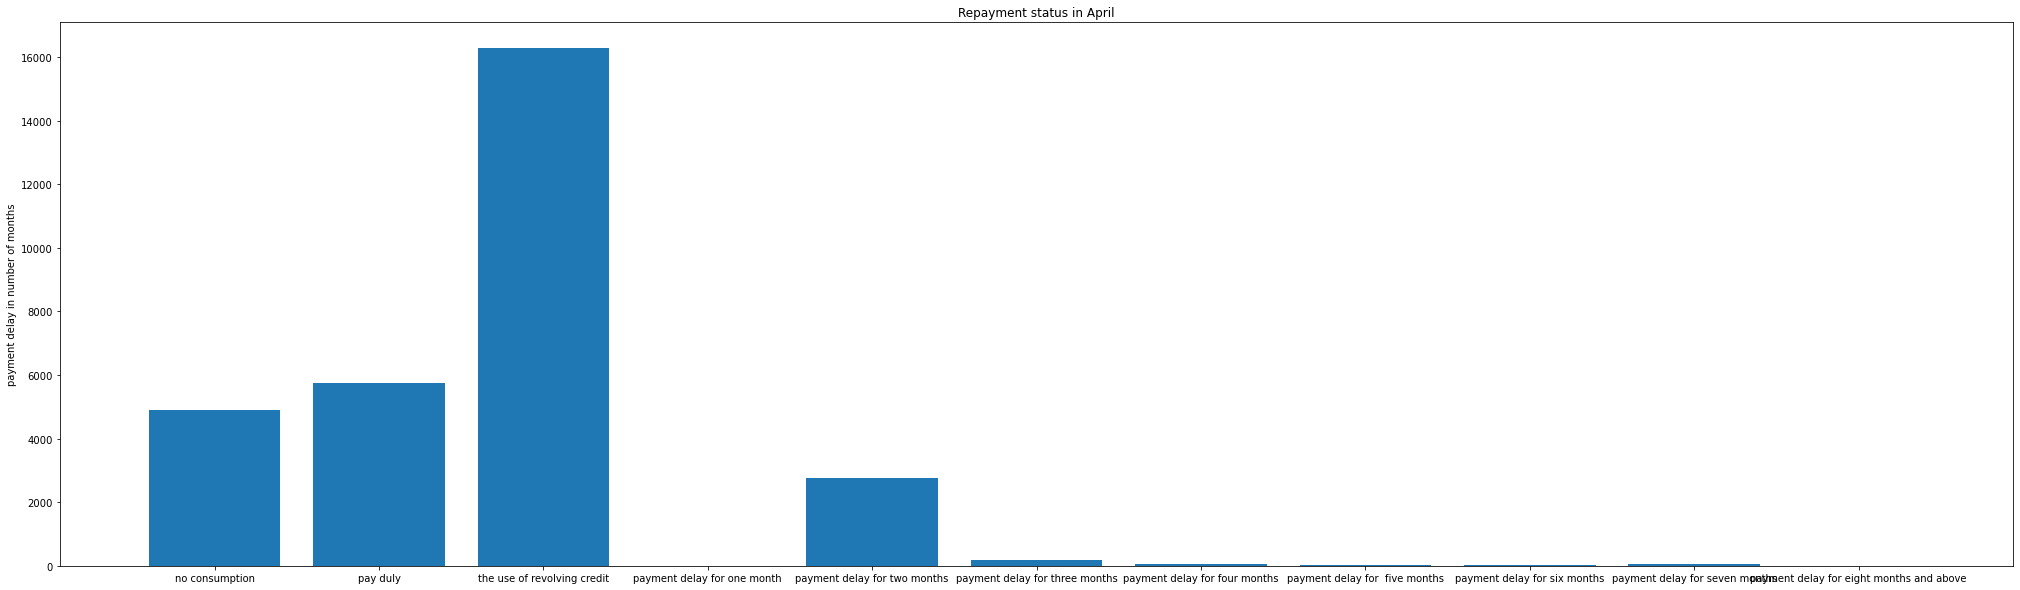

In [63]:
April = {'no consumption':4895, 'pay duly':5740,'the use of revolving credit':16286, 'payment delay for one month':0,
                     'payment delay for two months':2766,'payment delay for three months':184,
                     'payment delay for four months':49,'payment delay for  five months':13,
                     'payment delay for six months':19,'payment delay for seven months':46,
                     'payment delay for eight months and above':2}
fig,ax= plt.subplots(figsize = (35,10))
ax.bar(April.keys(),April.values())
ax.set(title='Repayment status in April',ylabel='payment delay in number of months')

## Target Variable

In [64]:
df['default.payment.next.month'].value_counts()

no     23364
yes     6636
Name: default.payment.next.month, dtype: int64

In [65]:
df['default.payment.next.month'].replace({'yes':1, 'no':0},inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [66]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [67]:
df['default.payment.next.month'].dtype

dtype('int64')

[Text(0.5, 1.0, 'default.payment.next.month'), Text(0, 0.5, 'Head_count')]

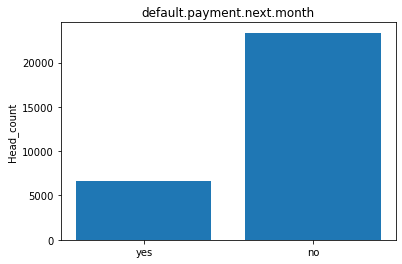

In [68]:
default_payment = {'yes':6636, 'no':23364}
fig,ax= plt.subplots()
ax.bar(default_payment.keys(),default_payment.values())
ax.set(title='default.payment.next.month',ylabel='Head_count')

In [69]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LIMIT_BAL                                30000 non-null  float64
 1   SEX                                      30000 non-null  int64  
 2   EDUCATION                                30000 non-null  int64  
 3   MARRIAGE                                 30000 non-null  int64  
 4   AGE                                      30000 non-null  int64  
 5   Repayment status in September            30000 non-null  int64  
 6   Repayment status in August               30000 non-null  int64  
 7   Repayment status in July                 30000 non-null  int64  
 8   Repayment status in June                 30000 non-null  int64  
 9   Repayment status in May                  30000 non-null  int64  
 10  Repayment status in April                30000

In [71]:
df.columns 

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment status in September', 'Repayment status in August',
       'Repayment status in July', 'Repayment status in June',
       'Repayment status in May', 'Repayment status in April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'Amount of previous payment in September',
       'Amount of previous payment in August',
       'Amount of previous payment in July',
       'Amount of previous payment in June',
       'Amount of previous payment in May',
       'Amount of previous payment in April', 'default.payment.next.month'],
      dtype='object')

# Feature-> 12 (Amount of bill statement in September)

In [72]:
df['Amount of bill statement in September'].value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
11636.0        1
146034.0       1
20817.0        1
1351.0         1
47929.0        1
Name: Amount of bill statement in September, Length: 22723, dtype: int64

In [73]:
df['Amount of bill statement in September'].nunique()

22723

<AxesSubplot:xlabel='Amount of bill statement in September', ylabel='Density'>

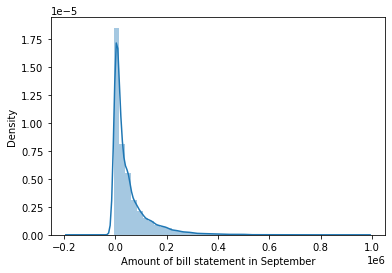

In [74]:
sns.distplot(df['Amount of bill statement in September'])

<AxesSubplot:xlabel='Amount of bill statement in September'>

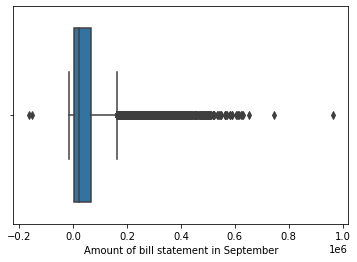

In [75]:
sns.boxplot(df['Amount of bill statement in September'])

3558.75 22381.5 67091.0


162389.375 -91739.625







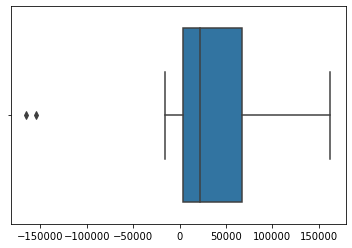

In [76]:
df['Amount of bill statement in September'] = Outliers(df['Amount of bill statement in September'])

<AxesSubplot:xlabel='Amount of bill statement in September'>

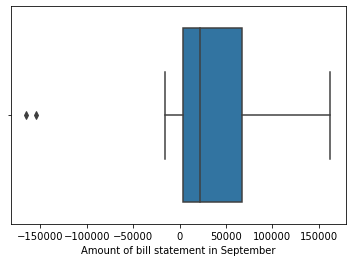

In [77]:
sns.boxplot(df['Amount of bill statement in September'])

# Feature-> 13 (Amount of bill statement in August)

In [78]:
df['Amount of bill statement in August'].nunique()

22346

<AxesSubplot:xlabel='Amount of bill statement in August', ylabel='Density'>

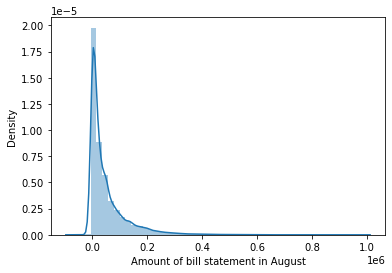

In [79]:
sns.distplot(df['Amount of bill statement in August'])

<AxesSubplot:xlabel='Amount of bill statement in August'>

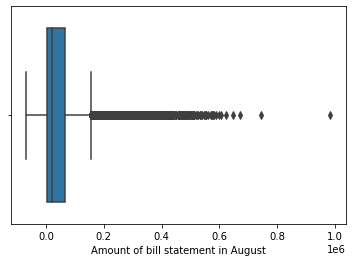

In [80]:
sns.boxplot(df['Amount of bill statement in August'])

2984.75 21200.0 64006.25


155538.5 -88547.5







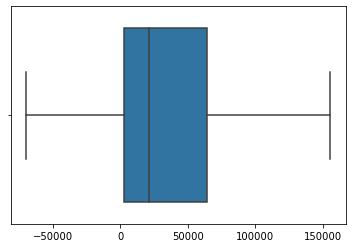

In [81]:
df['Amount of bill statement in August'] = Outliers(df['Amount of bill statement in August'])

<AxesSubplot:xlabel='Amount of bill statement in August'>

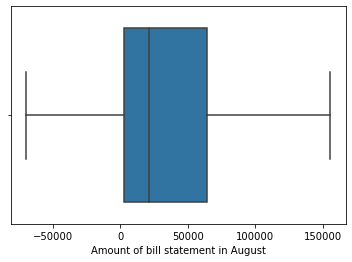

In [82]:
sns.boxplot(df['Amount of bill statement in August'])

# Feature-> 14 (Amount of bill statement in July)

In [83]:
df['Amount of bill statement in July'].nunique()

22026

<AxesSubplot:xlabel='Amount of bill statement in July', ylabel='Density'>

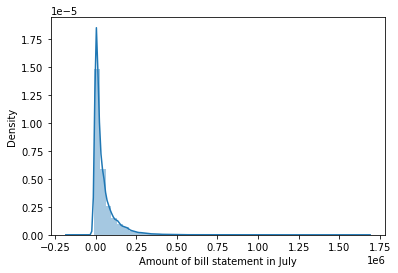

In [84]:
sns.distplot(df['Amount of bill statement in July'])

<AxesSubplot:xlabel='Amount of bill statement in July'>

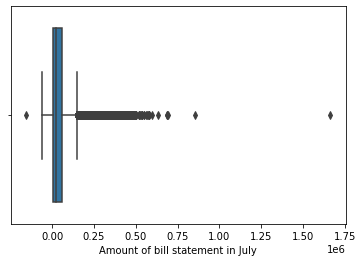

In [85]:
sns.boxplot(df['Amount of bill statement in July'])

2666.25 20088.5 60164.75


146412.5 -83581.5







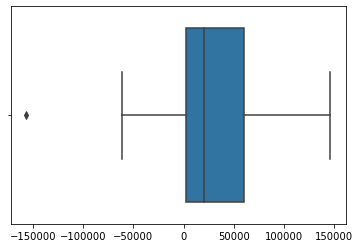

In [86]:
df['Amount of bill statement in July'] = Outliers(df['Amount of bill statement in July'])

<AxesSubplot:xlabel='Amount of bill statement in July'>

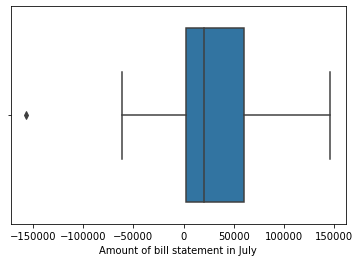

In [87]:
sns.boxplot(df['Amount of bill statement in July'])

# Feature-> 15 (Amount of bill statement in June)

In [88]:
df['Amount of bill statement in June'].nunique()

21548

<AxesSubplot:xlabel='Amount of bill statement in June', ylabel='Density'>

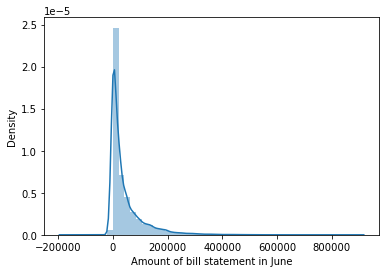

In [89]:
sns.distplot(df['Amount of bill statement in June'])

<AxesSubplot:xlabel='Amount of bill statement in June'>

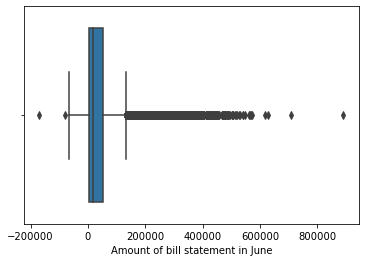

In [90]:
sns.boxplot(df['Amount of bill statement in June'])

2326.75 19052.0 54506.0


132774.875 -75942.125







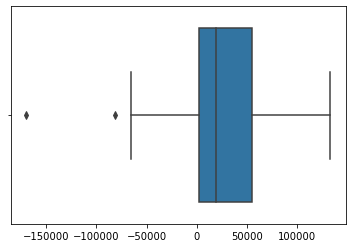

In [91]:
df['Amount of bill statement in June'] = Outliers(df['Amount of bill statement in June'])

<AxesSubplot:xlabel='Amount of bill statement in June'>

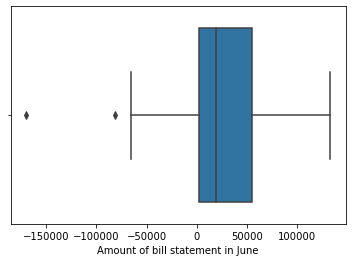

In [92]:
sns.boxplot(df['Amount of bill statement in June'])

# Feature-> 16 (Amount of bill statement in May)

In [93]:
df['Amount of bill statement in May'].nunique()

21010

<AxesSubplot:xlabel='Amount of bill statement in May', ylabel='Density'>

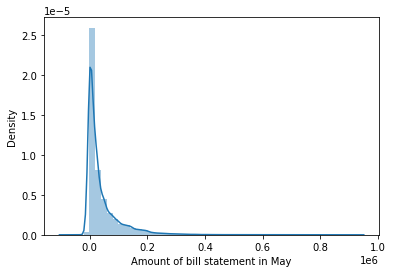

In [94]:
sns.distplot(df['Amount of bill statement in May'])

<AxesSubplot:xlabel='Amount of bill statement in May'>

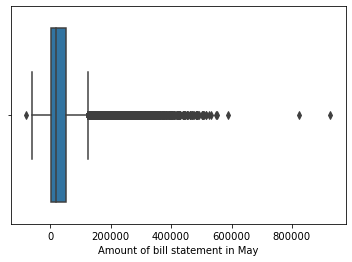

In [95]:
sns.boxplot(df['Amount of bill statement in May'])

1763.0 18104.5 50190.5


122831.75 -70878.25







array([    0.,  3455., 14948., ..., 20582., 11855., 32428.])

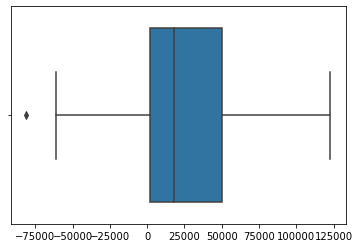

In [96]:
Outliers(df['Amount of bill statement in May'])

# Feature-> 17 (Amount of bill statement in April)

In [97]:
df['Amount of bill statement in April'].nunique()

20604

<AxesSubplot:xlabel='Amount of bill statement in April', ylabel='Density'>

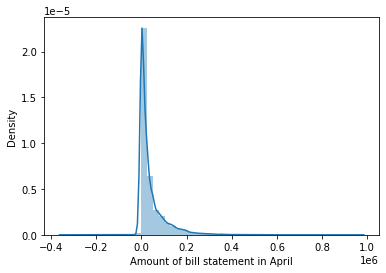

In [98]:
sns.distplot(df['Amount of bill statement in April'])

<AxesSubplot:xlabel='Amount of bill statement in April'>

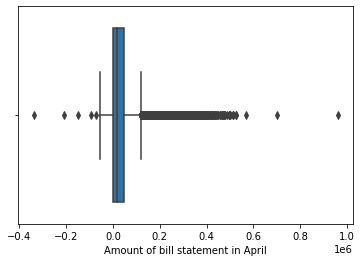

In [99]:
sns.boxplot(df['Amount of bill statement in April'])

1256.0 17071.0 49198.25


121111.625 -70657.375







array([    0.,  3261., 15549., ..., 19357., 48944., 15313.])

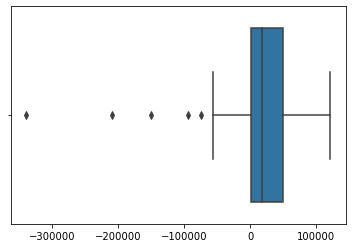

In [100]:
Outliers(df['Amount of bill statement in April'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LIMIT_BAL                                30000 non-null  float64
 1   SEX                                      30000 non-null  int64  
 2   EDUCATION                                30000 non-null  int64  
 3   MARRIAGE                                 30000 non-null  int64  
 4   AGE                                      30000 non-null  int64  
 5   Repayment status in September            30000 non-null  int64  
 6   Repayment status in August               30000 non-null  int64  
 7   Repayment status in July                 30000 non-null  int64  
 8   Repayment status in June                 30000 non-null  int64  
 9   Repayment status in May                  30000 non-null  int64  
 10  Repayment status in April                30000

# Feature 18 -> (Amount of previous payment in September)

In [102]:
df['Amount of previous payment in September'].nunique()

7943

In [103]:
df['Amount of previous payment in September'].value_counts()

0.0        5249
2000.0     1363
3000.0      891
5000.0      698
1500.0      507
           ... 
3391.0        1
7785.0        1
66022.0       1
10121.0       1
85900.0       1
Name: Amount of previous payment in September, Length: 7943, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in September', ylabel='Density'>

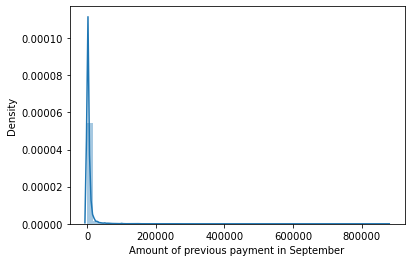

In [104]:
sns.distplot(df['Amount of previous payment in September'])

<AxesSubplot:xlabel='Amount of previous payment in September'>

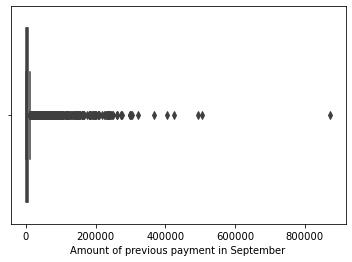

In [105]:
sns.boxplot(df['Amount of previous payment in September'])

# feature 19 ->  (Amount of previous payment in August)

In [106]:
df['Amount of previous payment in August'].nunique()

7899

In [107]:
df['Amount of previous payment in August'].value_counts()

0.0        5396
2000.0     1290
3000.0      857
5000.0      717
1000.0      594
           ... 
7866.0        1
6206.0        1
10529.0       1
21300.0       1
3526.0        1
Name: Amount of previous payment in August, Length: 7899, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in August', ylabel='Density'>

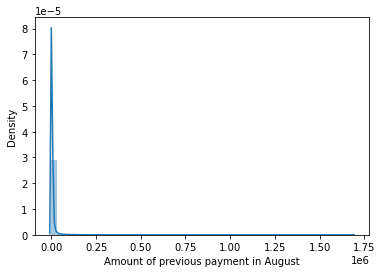

In [108]:
sns.distplot(df['Amount of previous payment in August'])

<AxesSubplot:xlabel='Amount of previous payment in August'>

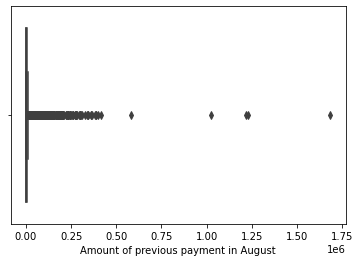

In [109]:
sns.boxplot(df['Amount of previous payment in August'])

# Feature 20 -> (Amount of previous payment in July)

In [110]:
df['Amount of previous payment in July'].nunique()

7518

In [111]:
df['Amount of previous payment in July'].value_counts()

0.0        5968
2000.0     1285
1000.0     1103
3000.0      870
5000.0      721
           ... 
5102.0        1
5368.0        1
28138.0       1
549.0         1
25128.0       1
Name: Amount of previous payment in July, Length: 7518, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in July', ylabel='Density'>

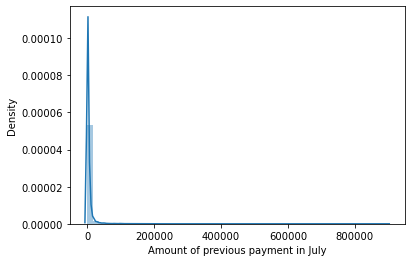

In [112]:
sns.distplot(df['Amount of previous payment in July'])

<AxesSubplot:xlabel='Amount of previous payment in July'>

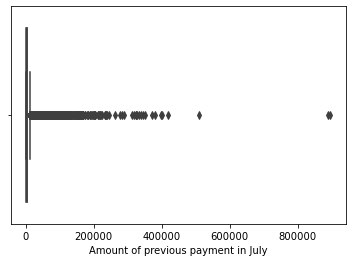

In [113]:
sns.boxplot(df['Amount of previous payment in July'])

# Feature 21 -> (Amount of previous payment in June)

In [114]:
df['Amount of previous payment in June'].nunique()

6937

In [115]:
df['Amount of previous payment in June'].value_counts()

0.0        6408
1000.0     1394
2000.0     1214
3000.0      887
5000.0      810
           ... 
18916.0       1
3468.0        1
11476.0       1
4363.0        1
8049.0        1
Name: Amount of previous payment in June, Length: 6937, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in June', ylabel='Density'>

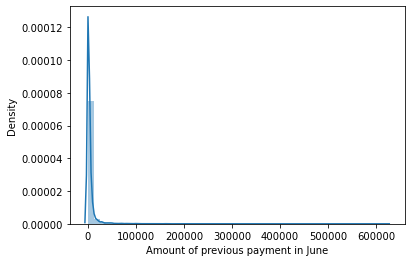

In [116]:
sns.distplot(df['Amount of previous payment in June'])

<AxesSubplot:xlabel='Amount of previous payment in June'>

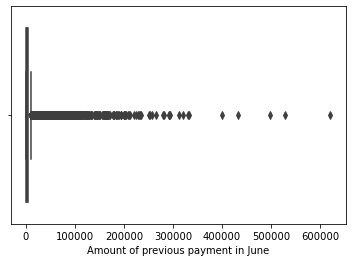

In [117]:
sns.boxplot(df['Amount of previous payment in June'])

# Feature 22 -> (Amount of previous payment in May)

In [118]:
df['Amount of previous payment in May'].nunique()

6897

In [119]:
df['Amount of previous payment in May'].value_counts()

0.0        6703
1000.0     1340
2000.0     1323
3000.0      947
5000.0      814
           ... 
9111.0        1
16496.0       1
4819.0        1
10078.0       1
52964.0       1
Name: Amount of previous payment in May, Length: 6897, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in May', ylabel='Density'>

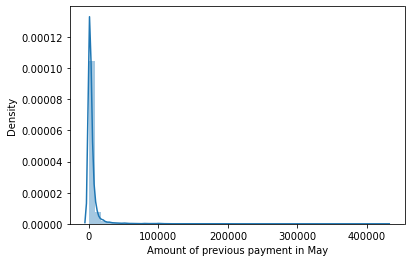

In [120]:
sns.distplot(df['Amount of previous payment in May'])

<AxesSubplot:xlabel='Amount of previous payment in May'>

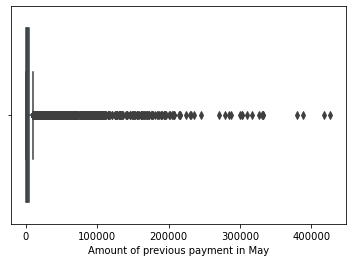

In [121]:
sns.boxplot(df['Amount of previous payment in May'])

# Feature 23 -> (Amount of previous payment in April)

In [122]:
df['Amount of previous payment in April'].nunique()

6939

In [123]:
df['Amount of previous payment in April'].value_counts()

0.0        7173
1000.0     1299
2000.0     1295
3000.0      914
5000.0      808
           ... 
7329.0        1
6862.0        1
6525.0        1
11894.0       1
16080.0       1
Name: Amount of previous payment in April, Length: 6939, dtype: int64

<AxesSubplot:xlabel='Amount of previous payment in April', ylabel='Density'>

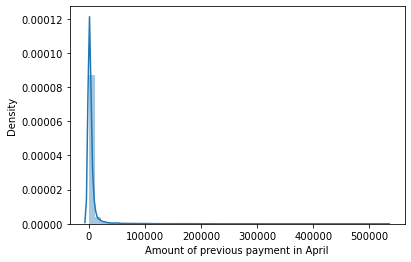

In [124]:
sns.distplot(df['Amount of previous payment in April'])

<AxesSubplot:xlabel='Amount of previous payment in April'>

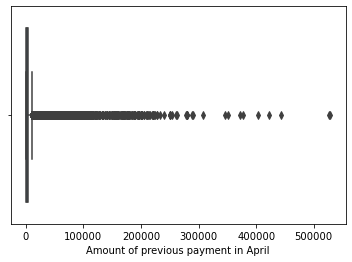

In [125]:
sns.boxplot(df['Amount of previous payment in April'])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LIMIT_BAL                                30000 non-null  float64
 1   SEX                                      30000 non-null  int64  
 2   EDUCATION                                30000 non-null  int64  
 3   MARRIAGE                                 30000 non-null  int64  
 4   AGE                                      30000 non-null  int64  
 5   Repayment status in September            30000 non-null  int64  
 6   Repayment status in August               30000 non-null  int64  
 7   Repayment status in July                 30000 non-null  int64  
 8   Repayment status in June                 30000 non-null  int64  
 9   Repayment status in May                  30000 non-null  int64  
 10  Repayment status in April                30000

In [127]:
corr = df.corr()

<AxesSubplot:>

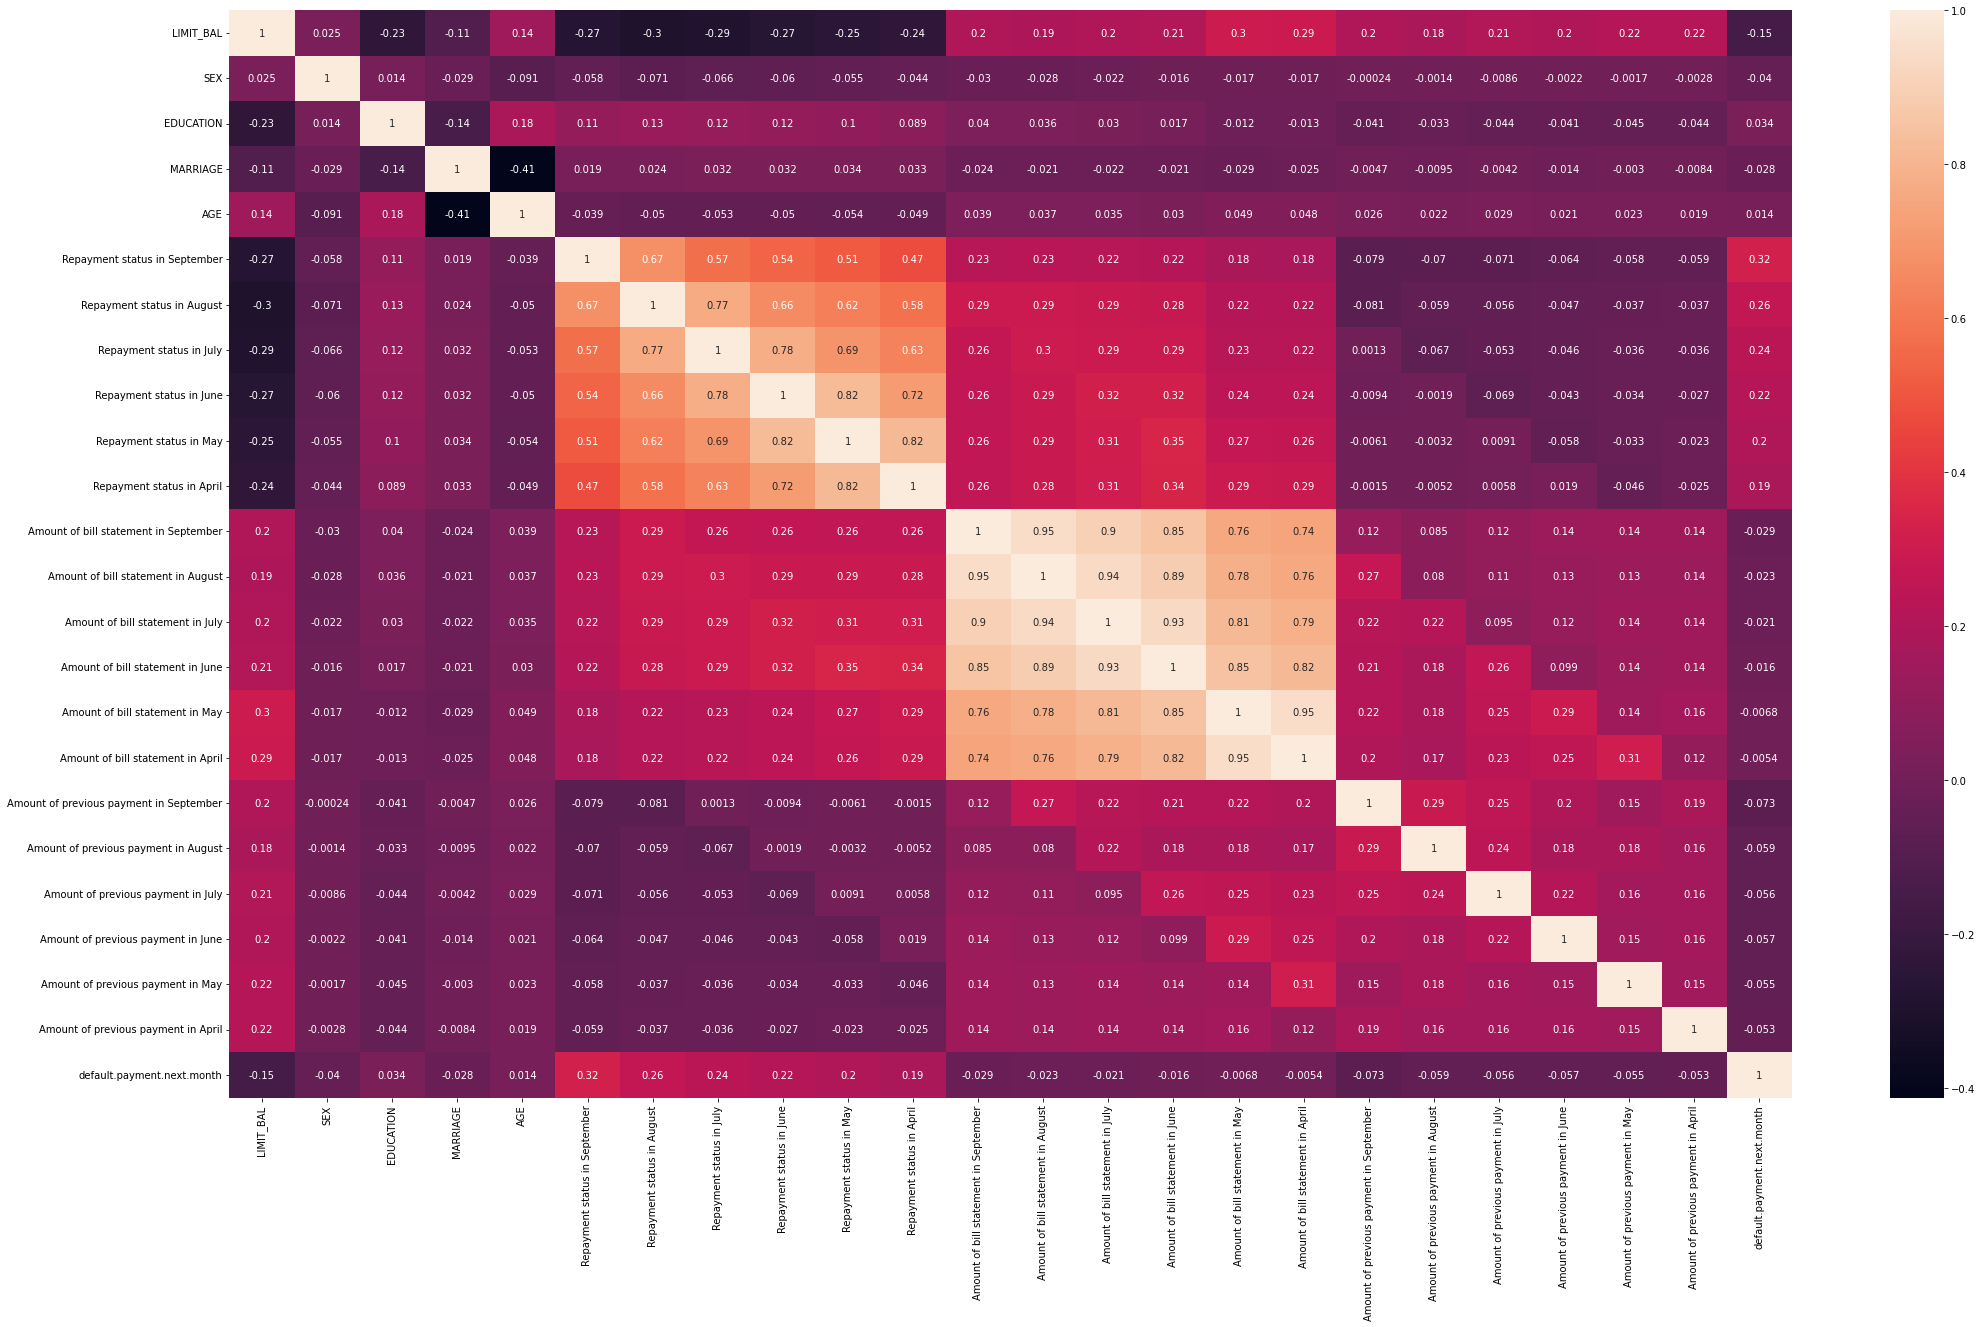

In [128]:
plt.figure(figsize=(35,20))
sns.heatmap(corr,annot=True)

# Step 4 -> Feature Selection

In [129]:
y = df['default.payment.next.month']
x = df.drop('default.payment.next.month',axis=1)

In [130]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [131]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in July,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,146412.5,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# Step 5 -> Model Building 

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [133]:
print(x_train.shape,x_test.shape)

(24000, 23) (6000, 23)


# features scaling 

In [134]:
# feature scaling on training data
normal_scaler = MinMaxScaler()
x_train_scaled = normal_scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in July,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April
0,0.333333,1.0,0.000000,0.5,0.155172,0.1,0.111111,0.1,0.1,0.2,...,0.552795,0.717556,0.116022,0.276879,0.024087,0.006298,0.052741,0.001583,0.048510,0.045112
1,0.090909,1.0,0.333333,0.0,0.258621,0.3,0.444444,0.4,0.4,0.4,...,0.629374,0.677094,0.114507,0.288211,0.000000,0.001781,0.002232,0.000000,0.004689,0.006620
2,0.121212,0.0,0.666667,0.0,0.103448,0.1,0.111111,0.1,0.1,0.0,...,0.522326,0.561473,0.080648,0.263053,0.002290,0.000804,0.000000,0.000000,0.006328,0.007124
3,0.141414,1.0,0.000000,0.0,0.517241,0.3,0.000000,0.0,0.0,0.0,...,0.517867,0.561473,0.080648,0.260979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.232323,1.0,0.333333,0.0,0.431034,0.2,0.222222,0.2,0.2,0.0,...,1.000000,0.561473,0.080648,0.260979,0.008074,0.003871,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.313131,0.0,0.000000,0.0,0.431034,0.4,0.666667,0.5,0.4,0.4,...,1.000000,1.000000,0.405428,0.504687,0.005724,0.000000,0.000000,0.038325,0.000000,0.023011
23996,0.333333,0.0,0.666667,0.0,0.465517,0.2,0.222222,0.2,0.2,0.2,...,0.734630,0.772445,0.134039,0.300927,0.001579,0.036742,0.002396,0.002987,0.004159,0.002915
23997,0.070707,1.0,0.333333,0.5,0.189655,0.2,0.222222,0.4,0.2,0.2,...,0.564650,0.609836,0.095379,0.272629,0.003056,0.000416,0.000750,0.000966,0.001289,0.001078
23998,0.010101,0.0,0.333333,0.5,0.155172,0.3,0.000000,0.0,0.0,0.0,...,0.514310,0.556618,0.078804,0.259250,0.000000,0.000000,0.000000,0.000000,0.000000,0.007566


In [135]:
# feature scaling on testing data
normal_scaler = MinMaxScaler()
x_test_scaled = normal_scaler.fit_transform(x_test)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in July,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April
0,0.216216,0.0,0.000000,0.0,0.240741,0.2,0.2,0.2,0.222222,0.222222,...,0.415640,0.457097,0.119566,0.336212,0.006639,0.004813,0.003626,0.002515,0.003302,0.000417
1,0.067568,0.0,0.000000,0.5,0.074074,0.2,0.2,0.2,0.222222,0.222222,...,0.242023,0.359511,0.104464,0.335164,0.004967,0.004813,0.004789,0.004999,0.006605,0.001897
2,0.310811,0.0,0.000000,0.0,0.259259,0.2,0.2,0.2,0.222222,0.222222,...,1.000000,1.000000,0.334646,0.549028,0.024520,0.019264,0.014380,0.077271,0.016511,0.009770
3,0.054054,0.0,0.333333,0.5,0.074074,0.1,0.1,0.1,0.111111,0.222222,...,0.214541,0.260967,0.085243,0.313797,0.000000,0.027674,0.000457,0.017998,0.006605,0.013279
4,0.256757,1.0,0.666667,0.0,0.388889,0.2,0.2,0.2,0.222222,0.444444,...,0.156242,0.269936,0.074872,0.305547,0.004454,0.002666,0.001602,0.000000,0.002926,0.004581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.189189,1.0,0.333333,0.0,0.240741,0.0,0.0,0.0,0.000000,0.000000,...,0.148049,0.260549,0.073580,0.306441,0.000000,0.000000,0.000278,0.000000,0.004953,0.000000
5996,0.256757,1.0,0.000000,0.0,0.388889,0.0,0.0,0.0,0.000000,0.111111,...,0.148049,0.259903,0.076468,0.304258,0.000000,0.000000,0.000000,0.004574,0.000000,0.000000
5997,0.337838,1.0,0.000000,0.5,0.277778,0.0,0.0,0.0,0.000000,0.111111,...,0.161316,0.264061,0.076718,0.306685,0.008732,0.005487,0.001786,0.004972,0.005508,0.004942
5998,0.216216,1.0,0.333333,0.5,0.074074,0.2,0.2,0.2,0.222222,0.222222,...,0.299414,0.396306,0.110658,0.341128,0.009934,0.012032,0.004789,0.004999,0.016511,0.001698


In [136]:
lr_clf = LogisticRegression()

In [137]:
lr_clf.fit(x_train_df,y_train)

LogisticRegression()

In [138]:
y_pred = lr_clf.predict(x_test_df)

In [139]:
y_pred_train = lr_clf.predict(x_train_df)

In [140]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [141]:
y_test[:5]

24380    0
2508     0
10431    1
24017    0
11286    0
Name: default.payment.next.month, dtype: int64

# Step 6 -> Model Evaluation

In [142]:
residual = y_test - y_pred

In [143]:
residual

24380    0
2508     0
10431    1
24017    0
11286    0
        ..
196      0
26426    1
1932     0
21845    1
7320     0
Name: default.payment.next.month, Length: 6000, dtype: int64

In [144]:
# Accuracy of Training Data
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is:\n',cnf_matrix)
clf_report = classification_report(y_train,y_pred_train)
print('Classification Report is:\n',clf_report)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy of Model is:\n',accuracy)

Confusion Matrix is:
 [[18170   521]
 [ 4088  1221]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     18691
           1       0.70      0.23      0.35      5309

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.62     24000
weighted avg       0.79      0.81      0.77     24000

Accuracy of Model is:
 0.8079583333333333


In [145]:
# Accuracy of Testing Data
cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix is:\n',cnf_matrix)
clf_report = classification_report(y_test,y_pred)
print('Classification Report is:\n',clf_report)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Model is:\n',accuracy)

Confusion Matrix is:
 [[4133  540]
 [ 719  608]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      4673
           1       0.53      0.46      0.49      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000

Accuracy of Model is:
 0.7901666666666667


# Pickle file Creation

In [147]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lr_clf, file)

In [150]:
df.to_csv('CardDefaulter.csv')

In [148]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment status in September,Repayment status in August,Repayment status in July,Repayment status in June,Repayment status in May,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,Amount of previous payment in September,Amount of previous payment in August,Amount of previous payment in July,Amount of previous payment in June,Amount of previous payment in May,Amount of previous payment in April,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [149]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Repayment status in September', 'Repayment status in August',
       'Repayment status in July', 'Repayment status in June',
       'Repayment status in May', 'Repayment status in April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'Amount of previous payment in September',
       'Amount of previous payment in August',
       'Amount of previous payment in July',
       'Amount of previous payment in June',
       'Amount of previous payment in May',
       'Amount of previous payment in April', 'default.payment.next.month'],
      dtype='object')

In [151]:
input = pd.DataFrame({'LIMIT_BAL':[90000.0], 'SEX':[2], 'EDUCATION':[2], 'MARRIAGE':[2], 'AGE':[26],
       'Repayment status in September':[-1], 'Repayment status in August':[2],
       'Repayment status in July':[0], 'Repayment status in June':[0],
       'Repayment status in May':[0], 'Repayment status in April':[2],
       'Amount of bill statement in September':[2682],
       'Amount of bill statement in August':[1725],
       'Amount of bill statement in July':[2682], 'Amount of bill statement in June':[3272],
       'Amount of bill statement in May':[3455], 'Amount of bill statement in April':[3261],
       'Amount of previous payment in September':[0],
       'Amount of previous payment in August':[1000],
       'Amount of previous payment in July':[1000],
       'Amount of previous payment in June':[1000],
       'Amount of previous payment in May':[0],
       'Amount of previous payment in April':[2000]})

In [153]:
lr_clf.predict(input)

array([0], dtype=int64)

In [ ]:
{"LIMIT_BAL":90000, "SEX":2, "EDUCATION":2, "MARRIAGE":2, "AGE":26,
       "Repayment status in September":-1, "Repayment status in August":2,
       "Repayment status in July":0, "Repayment status in June":0,
       "Repayment status in May":0, "Repayment status in April":2,
       "Amount of bill statement in September":2682,
       "Amount of bill statement in August":1725,
       "Amount of bill statement in July":2682, "Amount of bill statement in June":3272,
       "Amount of bill statement in May":3455, "Amount of bill statement in April":3261,
       "Amount of previous payment in September":0,
       "Amount of previous payment in August":1000,
       "Amount of previous payment in July":1000,
       "Amount of previous payment in June":1000,
       "Amount of previous payment in May":0,
       "Amount of previous payment in April":2000}

In [ ]:
{"LIMIT_BAL":"90000", "SEX":"2", "EDUCATION":"2", "MARRIAGE":"2", "AGE":"26",
       "Repayment status in September":"-1", "Repayment status in August":"2",
       "Repayment status in July":"0", "Repayment status in June":"0",
       "Repayment status in May":"0", "Repayment status in April":"2",
       "Amount of bill statement in September":"2682",
       "Amount of bill statement in August":"1725",
       "Amount of bill statement in July":"2682", "Amount of bill statement in June":"3272",
       "Amount of bill statement in May":"3455", "Amount of bill statement in April":"3261",
       "Amount of previous payment in September":"0",
       "Amount of previous payment in August":"1000",
       "Amount of previous payment in July":"1000",
       "Amount of previous payment in June":"1000",
       "Amount of previous payment in May":"0",
       "Amount of previous payment in April":"2000"}